# Análise de Componentes Principais (PCA)
<br/>
<br/>

## Conteúdo
- [Pré-requisitos](#pre_requisitos)
- [Justificativa matemática](#justificativa_matematica)
- [Desenhando e testando o algoritmo](#desenhando_e_testando_o_algoritmo)
- [Indo um pouco além: Projeção com Erros Ortogonais]()
- [Introduzindo relações não lineares]()
- [Recomendações e Considerações Finais]()
- [Ligações Externas]()


<br/>
<a id='pre_requisitos'></a>
## Pré-requisitos

É preciso ter um conhecimento básico de Python, incluindo o mínimo de Python orientado à objetos. Caso não saiba programar, os cursos de [Introdução à Ciencia da Computação](https://br.udacity.com/course/intro-to-computer-science--cs101/) e [Fundamentos de Programação com Python](https://br.udacity.com/course/programming-foundations-with-python--ud036/) fornecem uma base suficiente sobre programação em Python e Python orientado à objetos, respectivamente. Além disso, é necessário ter conhecimento das bibliotecas de manipulação de dados Pandas e Numpy. Alguns bons tutoriais são o [Mini-curso 1](https://br.udacity.com/course/machine-learning-for-trading--ud501/) do curso de Aprendizado de Máquina para Negociação, o site [pythonprogramming.net](https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/) ou o primeiro curso do DataCamp em [Python](https://www.datacamp.com/getting-started?step=2&track=python).

Para entender o desenvolvimento do algoritmo é preciso ter o conhecimento de introdução à álgebra linear. Na UnB, a primeira parte do curso de Economia Quantitativa 1 já cobre o conteúdo necessário. Caso queira relembrar ou aprender esse conteúdo, o curso online do MIT de [Introdução à Álgebra Linear](https://www.youtube.com/playlist?list=PLE7DDD91010BC51F8) fornece uma boa base sobre a matemática que será desenvolvida nos algoritmos de aprendizado de máquina. Especificamente, é preciso ter uma boa noção de autovalores e autovetores. O prf. Daniel Cajueiro tem uma ótima [explicação](http://prorum.com/index.php/1561/alguem-explicar-intuitivamente-autovalores-autovetores) sobre esse assunto. Aliás, esse tutorial faz uso intenso da explicação do professor sobre o assunto. Caso queira dar uma olhada, [aqui](http://prorum.com/index.php/1557/estatistica-conhecido-componentes-principais-principal?show=1557#q1557) está ela. O outro material utilizado foi retirado do livro [Introduction to Machine Learning](https://mitpress.mit.edu/books/introduction-machine-learning).

Conhecimento de cálculo e principalmente otimização é fundamental para o entendimento dos algoritmos de aprendizado de máquina, que muitas vezes são encarados explicitamente como problemas de otimização. Uma noção de cálculo multivariado também ajudará na compreensão dos algoritmos, visto que muitas vezes otimizaremos em várias direções.

<br/>
<a id='justificativa_matematica'></a>
## Justificativa e matemática
Imagine que você quer entender o que impacta no preço de uma casa. Você então coleta vários dados e variáveis como área construida, área do terrendo, número de andares, quantidade de quartos, quantidade de banheiros, arquiteto, material principal das paredes, coordenadas geográficas... Você está confiante de que as características da casa tem influencia definitiva nos preços. Sua pergunta então é: quais das variáveis coletadas melhor as características da?  

Se umva variável não varia na amostra, ela obviamente não será de grande utilidade. Como exemplo (um pouco absurdo), imagine que você coletou dados na forma de uma variável binária sobre se a casa tem ou não portas. Claro que todas as casas na amostra tem portas! Assim, fica fácil ver que conhecimento dessa variável binária não nos oferece nenhuma informação adicional. Em outras palavras, ela não é útil para descrever as particularidades da casa.

Por outro lado, pode ser que existam variáveis que variam na amostra, mas que são praticamente redundantes. Pode haver combinações lineares das variáveis coletadas que descrevam melhor a casa do que uma das variáveis individualmente. Talvez nem todas as variáveis sejam necessárias. Por exemplo, é bem provável que casas com mais quartos tenham também mais banheiros, assim, conhecendo apenas uma delas já se obtem bastante informação sobre a outra. De certa forma, essas variáveis são redundantes. Considere também as variáveis de área construida e terreno. É provavel que o tamanho da casa influencia no preço, mas o que é o tamanho da casa? Devemos considerar área construida ou área do terreno? A verdade é que não temos a variável tamanho; o tamanho é uma variável que representa um conceito abstrato e que simplesmente não está nos nossos dados. Talvez pudessemos utilizar alguma combinação entre as variáveis de área construida e do terreno para inferir esse conceito abstrado que imaginamos como "tamanho".

A análise de componentes principal (PCA) serve justamente para resolver esses tipos de problemas: (1) se livrar de variáveis redundantes  e (2) montar variáveis latentes (conceitos abstartos) que não estão nos nossos dados de forma explícita. É importante ressaltar logo que PCA **não** acha um subconjunto das variáveis existentes que melhor representam os dados; ele cria variáveis novas que melhor representam os dados!

PCA é um método de aprendizagem não supervisionada no sentido de que não usa informações sobre a variável de saida ($y$), mas acha uma forma melhor de representar as variáveis de entrada ($X$). Matematicamente, PCA mapeia os dados em uma nova base dimensional orthonormal que maximiza variância e que melhor representa os dados, ou seja, com o mínimo de perda de informação possível. PCA projeta os dados em direções $\pmb{w}$ tal que a amostra, após projetada em $\pmb{w_1}$ é o mais espalhada possível, de forma que as diferenças entre cada observação fique mais aparente. Para uma solução única, faremos $||\pmb{w_1}||=1$. A projeção de $\pmb{x}$ na direção $\pmb{w}$ é dada por $z = \pmb{w}^T \pmb{x}$. Além disso, $Cov(X) = \Sigma$. A estimativa de $\Sigma$ é dada por $S = X^T X$. Assim, 

$$Var(z_1) = \pmb{w_1}^T S \pmb{w_1}$$

Nós estamos interessados no componente principal $\pmb{w_1}$ que maximize $Var(z_1)$, sujeito à restrição $||\pmb{w_1}||=1$:

\begin{equation*}
\begin{aligned}
& \underset{\pmb{w_1}}{\text{max}}
& & \pmb{w_1}^T S \pmb{w_1} \\
& \text{sujeito à}
&  &\pmb{w_1}^T \pmb{w_1} - 1 = 0
\end{aligned}
\end{equation*}

Na forma do lagrangeano:

\begin{equation*}
\begin{aligned}
& \underset{\pmb{w_1}}{\text{max}}
& \pmb{w_1}^T S \pmb{w_1} - \lambda_1(\pmb{w_1}^T \pmb{w_1} - 1)  
\end{aligned}
\end{equation*}

A CPO fica:

\begin{equation}
\begin{split}
    \frac{\partial \mathcal{L}}{\partial \pmb{w_1}}  &= \pmb{w_1}^T S \pmb{w_1} - \lambda_1(\pmb{w_1}^T \pmb{w_1} - 1)  \\
             &= 2 S \pmb{w_1} - 2\lambda_1 \pmb{w_1} = 0  \\
             & \therefore S \pmb{w_1} = \lambda_1 \pmb{w_1}
\end{split}
\end{equation}

O que será verdadeiro quando $\pmb{w_1}$ for um autovetor de $S$ e $\lambda_1$ o maior autovalor correspondente.  
O segundo componente principal, $\pmb{w_2}$,  também deve maximizar variância e também deve ser ortogonal a $\pmb{w_1}$:

\begin{equation*}
\begin{aligned}
& \underset{\pmb{w_2}}{\text{max}}
& \pmb{w_2}^T S \pmb{w_2} - \lambda_2(\pmb{w_2}^T \pmb{w_2} - 1) -\beta_1(\pmb{w_2}^T \pmb{w_1} - 0)  
\end{aligned}
\end{equation*}

A CPO fica:
\begin{equation}
\begin{split}
    \frac{\partial \mathcal{L}}{\partial \pmb{w_2}}  &= \pmb{w_2}^T S \pmb{w_2} - \lambda_2(\pmb{w_2}^T \pmb{w_2} - 1) -\beta_1(\pmb{w_2}^T \pmb{w_1} - 0) = 0\\
             &= 2 S \pmb{w_2} - 2\lambda_2 \pmb{w_2} - \beta \pmb{w_1} = 0 \\
             &= 2 \pmb{w_1}^T S \pmb{w_2} - 2 \lambda_2 \pmb{w_1}^T \pmb{w_2} - \beta \pmb{w_1}^T\pmb{w_1} = 0 \\
             &= 2  \pmb{w_2}^T S \pmb{w_1} - \beta \pmb{w_1}^T\pmb{w_1} = 0\\
             &= 2 \lambda_1 \pmb{w_2}^T \pmb{w_1} - \beta \pmb{w_1}^T\pmb{w_1} = 0\\
             &= \beta \pmb{w_1}^T\pmb{w_1} = 0\\
             &\therefore \beta = 0 \\
             &\therefore S \pmb{w_2} = \lambda_2 \pmb{w_2}
\end{split}
\end{equation}

O que será verdadeiro quando $\pmb{w_2}$ for um autovetor de $S$ e $\lambda_2$ o segundo maior autovalor correspondente. Os próximos componentes principais podem ser derivados de forma análoga. Note que usamos o fato que que $ \pmb{w_1} S \pmb{w_2}^T$ é um escalar, igual ao seu trasposto $\pmb{w_2}^T S \pmb{w_1}$; que $\pmb{w_1}$ é um autovetor de $S$ e, portanto $S \pmb{w_1} = \lambda_1 \pmb{w_1}$.

Concluimos que as dimenções cuja projeção nelas tem maior variância são dadas pelos autovetores da matriz de covariância $S$.  

Seja $X$ a matriz de dados, $W$ a matriz dos componentes principais em que cada coluna é um componente principal e $\pmb{\mu}$ o vetor de médias de cada variável. Definimos então:

$$Z = (X - \pmb{\mu}) W^T$$

Que é a projeção dos dados originais nos componentes principais após serem centrados na origem. Podemos enteder PCA então como um deslocamente dos eixos cartezianos, centrando-o meio dos dados, esticando-os ou comprimindo-os para ter tamanho unitário e rotacionando-os para maximizar variância.  

<br/>
<a id='desenhando_e_testando_o_algoritmo'></a>
## Desenhando e testando o algoritmo
Uma vez que tenhamos a fórmula acima, construir o algoritmo é bastante simples:

In [9]:
import pandas as pd # para manipulação de tabelas
import numpy as np # para álgebra linear
from sklearn.decomposition import PCA as skPCA # para ver se acertamos
import matplotlib.pyplot as plt # para gráficos
from matplotlib import style
from time import time
style.use('ggplot')
np.random.seed(12)

class PCA(object):

    def __init__(self, n_components):
        self.n_components = n_components


    def fit(self, X):
        S = np.dot(X.T, X) # matriz variância
        auto_val, auto_vect = np.linalg.eig(S) # achando os autovalores e autovetores

        sort_vect = np.argsort(auto_val)[::-1][:self.n_components] # para colocar em ordem crescente

        self.auto_val = auto_val[sort_vect]
        self.components_ = auto_vect[:, sort_vect]
        self.m = X.mean(axis=0) # média para centrar os dados


    def transform(self, X):
        return np.dot((X - self.m), self.components_) # projetando os dados


Outra função de PCA que não citamos ainda é vizualização de dados. PCA tem a capacidade de projetar os dados em dimenções de máxima variância e de variância decrescente.  Podemos então mapear dados com muitas dimenções em um número menor de dimenções, digamos, duas ou três, de forma que possamos vizualizar os dados com um gráfico e identificar clusters.

<IPython.core.display.Javascript object>


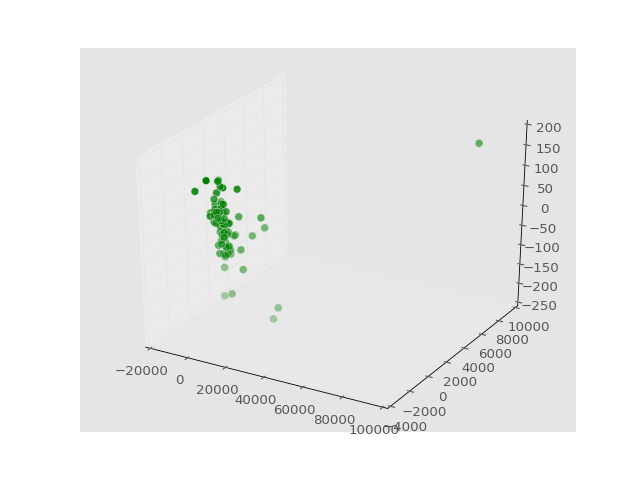

In [32]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

data = pd.read_csv('../data/hprice.csv', sep=',').ix[:, :6] # lendo os dados
data.fillna(-99999, inplace = True) # preenchendo valores vazios

pca = PCA(n_components=3)
pca.fit(data.values)
data = pca.transform(data)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='g', marker='o', s = 50)

plt.show()